In [3]:
import numpy as np
import pandas as pd

In [4]:
import chardet
with open('spam.csv','rb') as f:
    result=chardet.detect(f.read())
    print(result['encoding'])

Windows-1252


In [5]:
df=pd.read_csv('spam.csv',encoding='Windows-1252')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [6]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3461,spam,Bloomberg -Message center +447797706009 Why wa...,NaN,NaN,NaN
3437,ham,Its good to hear from you,NaN,NaN,NaN
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
3255,ham,Who were those people ? Were you in a tour ? I...,NaN,NaN,NaN
410,ham,Come by our room at some point so we can iron ...,NaN,NaN,NaN
4302,ham,Yup i'm free...,NaN,NaN,NaN
5168,ham,"I‰Û÷ve got some salt, you can rub it in my ope...",NaN,NaN,NaN
2307,spam,WIN a year supply of CDs 4 a store of ur choic...,NaN,NaN,NaN
1827,ham,Hey gorgeous man. My work mobile number is. Ha...,NaN,NaN,NaN
5180,ham,Babe! I fucking love you too !! You know? Fuck...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:


df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(10)

,v1,v2
4052,ham,I was slept that time.you there?
2150,ham,"The table's occupied, I'm waiting by the tree"
5354,ham,Aiyo cos i sms Ì_ then Ì_ neva reply so i wait...
1038,ham,"Edison has rightly said, \A fool can ask more ..."
4101,ham,Ok then i will come to ur home after half an hour
889,ham,Wife.how she knew the time of murder exactly
4354,ham,"Sorry, I can't help you on this."
5145,ham,Aiyar u so poor thing... I give u my support k...
3464,ham,"Haha figures, well I found the piece and prisc..."
1517,spam,Our brand new mobile music service is now live...


In [11]:

from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()

In [13]:
df['v1']=encoder.fit_transform(df['v1'])

In [14]:

df.head(10)

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [15]:

df.isnull().sum()

v1    0
v2    0
dtype: int64

In [16]:




df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
df['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

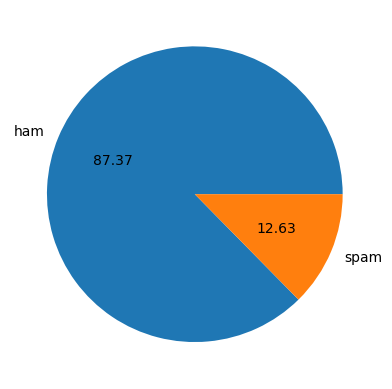

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['v1'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [23]:
df['num_characters']=df['v2'].apply(len)

In [24]:
df.head(10)

,v1,v2,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [25]:
df['num_words']=df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head(10)

,v1,v2,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39
6,0,Even my brother is not like to speak with me. ...,77,18
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31
8,1,WINNER!! As a valued network customer you have...,158,32
9,1,Had your mobile 11 months or more? U R entitle...,154,31


In [27]:
df['num_sentence']=df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head(10)

,v1,v2,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [29]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

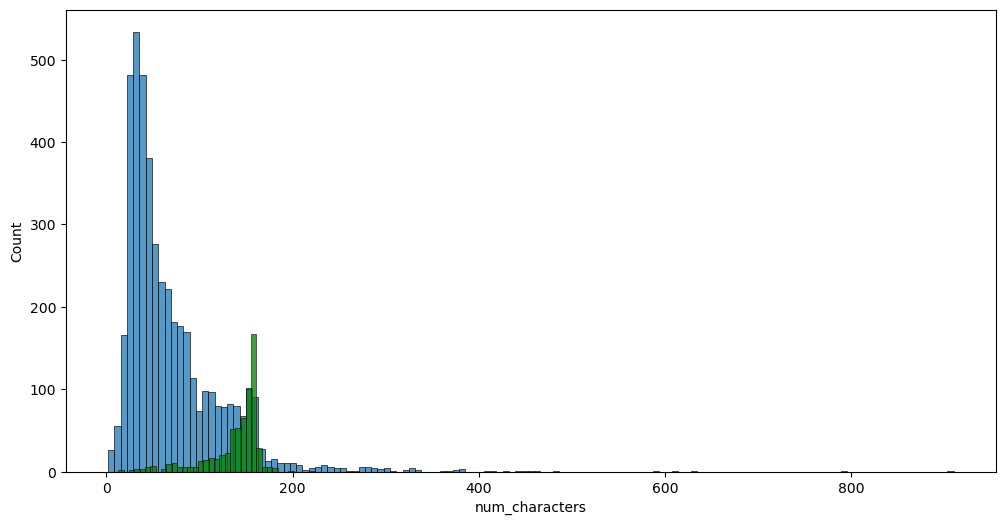

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1']==0]['num_characters'])
sns.histplot(df[df['v1']==1]['num_characters'],color='green')

<Axes: xlabel='num_words', ylabel='Count'>

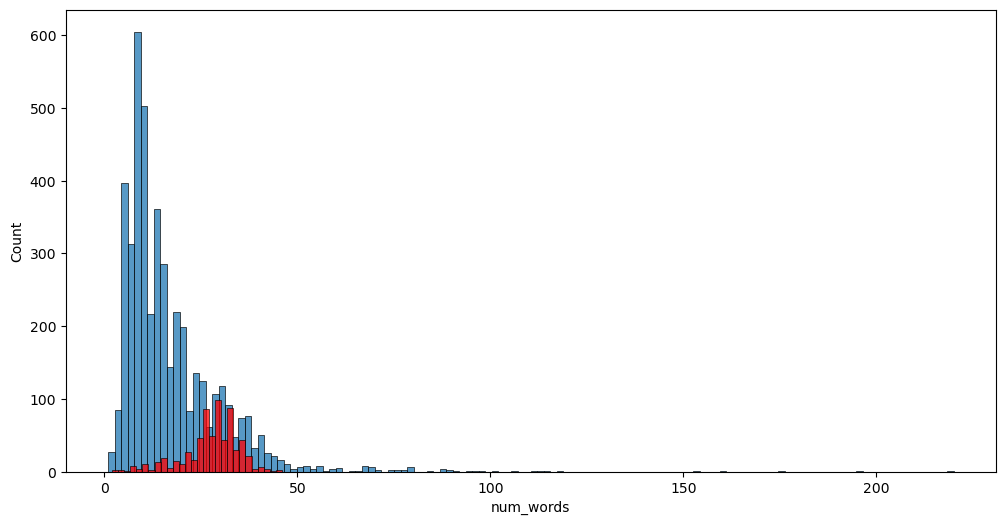

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['v1']==0]['num_words'])
sns.histplot(df[df['v1']==1]['num_words'],color='red')

C:\Users\DELL\.conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


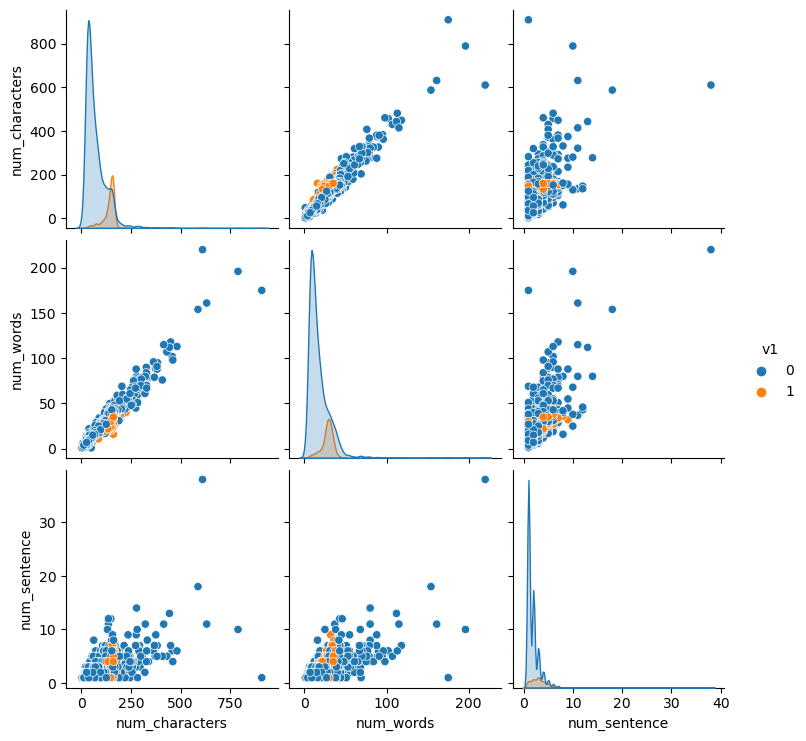

In [33]:
sns.pairplot(df,hue='v1')

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
ham = df[df['v1']==0].sample(653)


In [37]:
ham.head()


,v1,v2,num_characters,num_words,num_sentence
740,0,Yes i will be there. Glad you made it.,38,11,2
5530,0,I think that tantrum's finished so yeah I'll b...,64,15,1
3463,0,My phone,8,2,1
2135,0,"Carlos took a while (again), we leave in a minute",49,13,1
4148,0,Haven't found a way to get another app for you...,158,41,5


In [38]:

spam = df[df['v1']==1]


In [39]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 2 to 5567
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   v1              653 non-null    int32 
 1   v2              653 non-null    object
 2   num_characters  653 non-null    int64 
 3   num_words       653 non-null    int64 
 4   num_sentence    653 non-null    int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 28.1+ KB


In [40]:
df2 = pd.concat([ham,spam],axis=0)

In [41]:
df2.head()

,v1,v2,num_characters,num_words,num_sentence
740,0,Yes i will be there. Glad you made it.,38,11,2
5530,0,I think that tantrum's finished so yeah I'll b...,64,15,1
3463,0,My phone,8,2,1
2135,0,"Carlos took a while (again), we leave in a minute",49,13,1
4148,0,Haven't found a way to get another app for you...,158,41,5


In [42]:
hamt = df2[df2['v1']==1]
spamt = df2[df2['v1']==0]

In [43]:
hamt.head()

,v1,v2,num_characters,num_words,num_sentence
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3


In [44]:
ham_txt = " ".join(hamt['v2'])
len(ham_txt)

90695

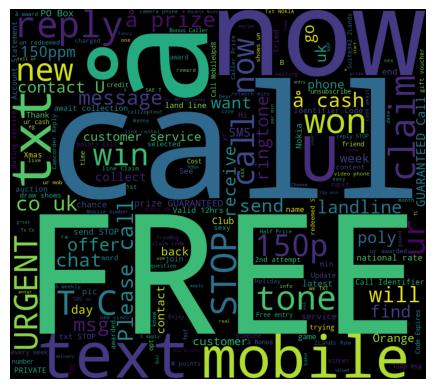

In [45]:
wc = WordCloud(width=900,height=800).generate(ham_txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [46]:
spamt.head()

,v1,v2,num_characters,num_words,num_sentence
740,0,Yes i will be there. Glad you made it.,38,11,2
5530,0,I think that tantrum's finished so yeah I'll b...,64,15,1
3463,0,My phone,8,2,1
2135,0,"Carlos took a while (again), we leave in a minute",49,13,1
4148,0,Haven't found a way to get another app for you...,158,41,5


In [47]:
spam_txt = " ".join(spamt['v2'])
len(spam_txt)

47095

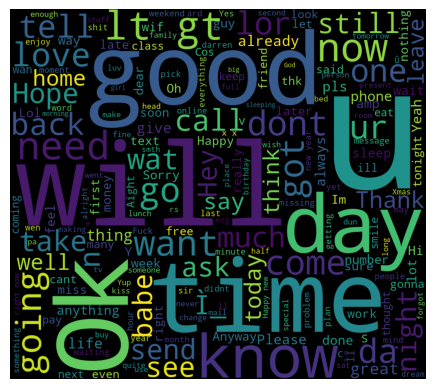

In [48]:
wc1 = WordCloud(width = 900,height = 800).generate(spam_txt)
plt.imshow(wc1)
plt.axis('off')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df2['v2'],df2['v1'],test_size=0.2,random_state=42,stratify=df2['v1'])

In [50]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1044,), (1044,), (262,), (262,))

In [87]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 4000)

In [88]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


In [89]:
def transform_text(v2):
    v2 = v2.lower()
    text = nltk.word_tokenize(v2)
    
    y = []
    for i in v2:
        if i.isalnum():
            y.append(i)
    v2 = y[:]
    y.clear()
    
    for i in v2:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            v2 = y[:]
    y.clear()
    ps = PorterStemmer()
    for i in v2:
        y.append(ps.stem(i))
    
    return " ".join(y)
    

In [90]:
df['v2'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [91]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'g n n b e h e n n n w n l k b u h u f f n r e n g h k v e c r e e n u g h'

In [92]:
df['transformed_text'] = df['v2'].apply(transform_text)

In [93]:
df.head(5)

,v1,v2,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,g u n l j u r n g p n c r z v l b l e n l n b ...
1,0,Ok lar... Joking wif u oni...,29,8,2,k l r j k n g w f u n
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,f r e e e n r n 2 w k l c p w n f c u p f n l ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u u n e r l h r u c l r e h e n
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,n h n h n k h e g e u f h e l v e r u n h e r ...


In [123]:
df['v1'].replace([np.nan],1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5567    1.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: v1, Length: 5169, dtype: float64

NameError: name 'classification_rep' is not defined

ValueError: could not convert string to float: 'Ok., is any problem to u frm him? Wats matter?'

In [107]:
df['v1'].dropna()

Series([], Name: v1, dtype: float64)